# NMF Test

In [33]:
# imports
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

from NonnegMFPy import nmf

#from ihip.ihop import io as ihop_io
from ihop.hydrolight import loisel23

In [2]:
%matplotlib ipympl

# Load spectra

In [3]:
X=4
Y=0
ds = loisel23.load_ds(X, Y)

In [21]:
spec = ds['a'].data
spec.shape

(3320, 81)

# Cut

In [22]:
keep = ds.Lambda < 700.

In [23]:
spec = spec[:,keep]

# Run it!

In [24]:
g = nmf.NMF(spec.T, n_components=5)

In [25]:
chi2, time_used = g.SolveNMF() 

Current Chi2=0.0040, Previous Chi2=1.3230, Change=99.7000% @ niters=0
Current Chi2=0.0001, Previous Chi2=0.0002, Change=12.4266% @ niters=20
Current Chi2=0.0000, Previous Chi2=0.0000, Change=2.1098% @ niters=40
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.5219% @ niters=60
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.1884% @ niters=80
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0857% @ niters=100
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0378% @ niters=120
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0180% @ niters=140
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0099% @ niters=160
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0099% @ niters=180
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0271% @ niters=200
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0346% @ niters=220
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0187% @ niters=240
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0139% @ niters=260
Current Ch

In [26]:
g.W.shape

(70, 5)

# Plot the basis set

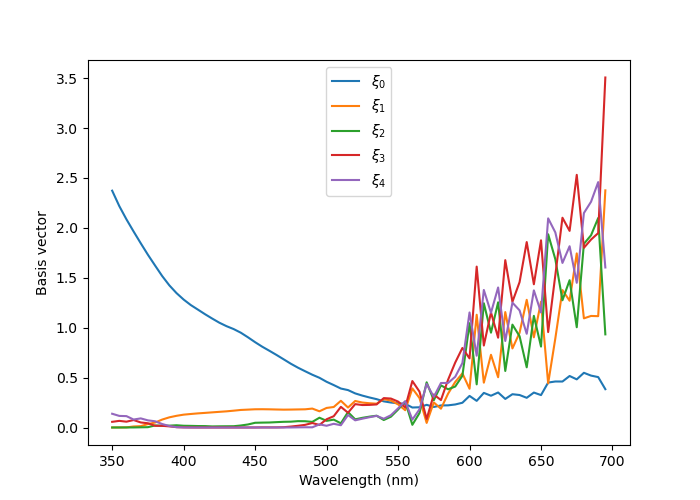

In [27]:
M = g.W.T
wave = ds.Lambda.data[keep]
#
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
for ss in range(5):
    ax.plot(wave,M[ss], label=r'$\xi_'+f'{ss}'+'$')
#ax.plot(wave,M[1], label=r'$\xi_2$')
#ax.plot(wave,M[2], label=r'$\xi_3$')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Basis vector')
ax.legend()
#
plt.show()

# Reconstruct one

In [35]:
g.H.shape, g.W.shape

((5, 3320), (70, 5))

In [31]:
g.H[:,0]

array([0.01076157, 0.00491633, 0.06268624, 0.10876674, 0.06676776])

In [56]:
idx = 1000
recon = np.dot(g.H[:,idx], g.W.T)
recon.shape

(70,)

## Plot

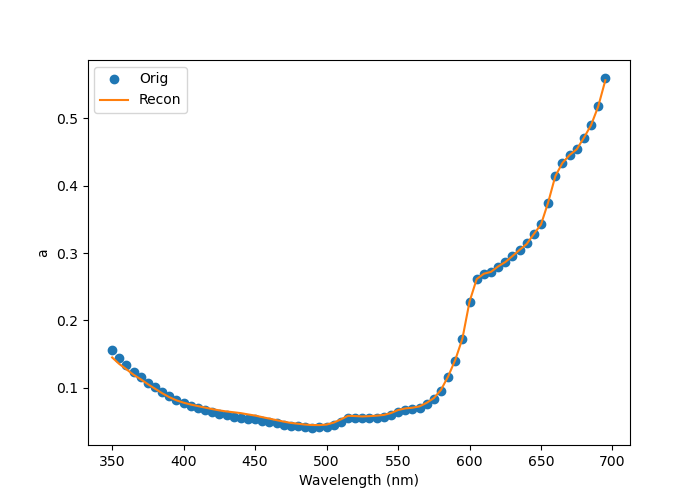

In [57]:
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
#for ss in range(5):
#    ax.plot(wave,M[ss], label=r'$\xi_'+f'{ss}'+'$')
ax.plot(wave,spec[idx, :], 'o', label=r'Orig')
ax.plot(wave,recon, label=r'Recon')
#ax.plot(wave,M[2], label=r'$\xi_3$')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('a')
ax.legend()
#
plt.show()

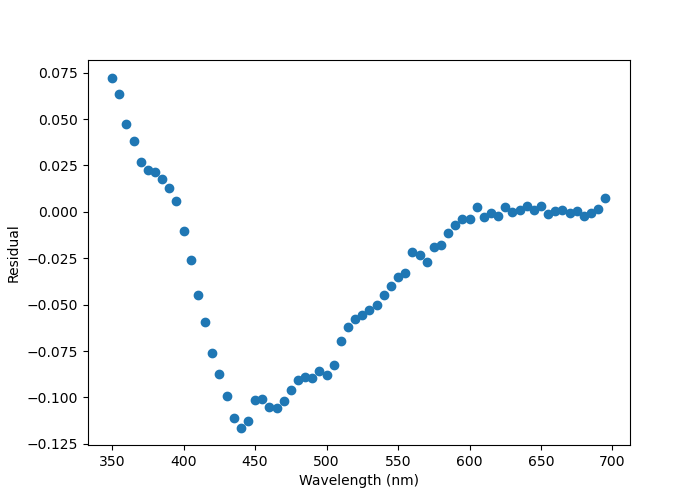

In [59]:
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
#for ss in range(5):
#    ax.plot(wave,M[ss], label=r'$\xi_'+f'{ss}'+'$')
ax.plot(wave,(spec[idx, :]-recon)/spec[idx,:], 'o')
#ax.plot(wave,recon, label=r'Recon')
#ax.plot(wave,M[2], label=r'$\xi_3$')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Residual')
#ax.legend()
#
plt.show()
